In [ ]:
#%pip install transformers

https://huggingface.co/docs/transformers/en/model_doc/vit

In [20]:
import torch
from transformers import ViTForImageClassification, ViTFeatureExtractor
from PIL import Image
import requests
import matplotlib.pyplot as plt

In [21]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

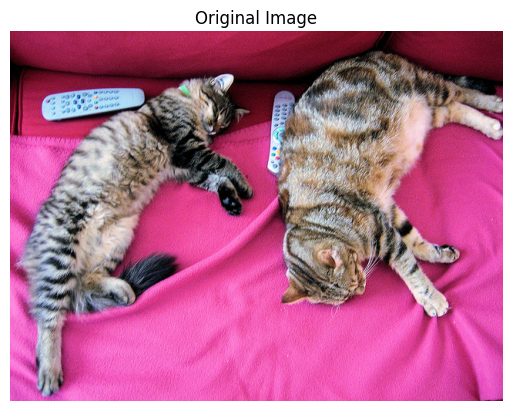

In [22]:
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [23]:
model_name = 'google/vit-base-patch16-224'
model = ViTForImageClassification.from_pretrained(model_name)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [26]:
inputs = feature_extractor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_idx = logits.argmax(-1).item()
predicted_class_label = model.config.id2label[predicted_class_idx]

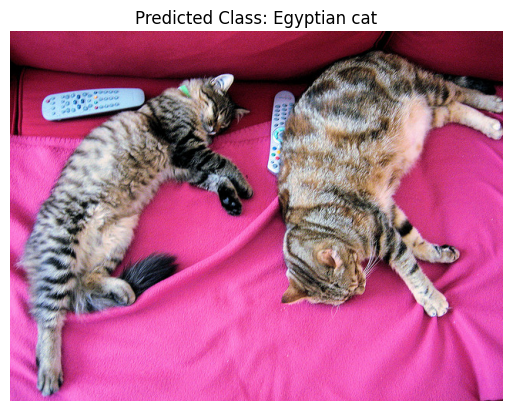

Predicted Class Index: 285
Predicted Class Label: Egyptian cat


In [27]:
plt.imshow(image)
plt.title(f"Predicted Class: {predicted_class_label}")
plt.axis("off")
plt.show()

print(f"Predicted Class Index: {predicted_class_idx}")
print(f"Predicted Class Label: {predicted_class_label}")

https://huggingface.co/blog/fine-tune-vit